#primero vinculo el drive y leo el dataset e imprimo caracteristicas

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/TP 1 Datos/data/hotels_train.csv")
print(df)

Mounted at /content/drive
              hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                

#Exploracion inicial del dataset
agarro 2 registros iniciales cualesquiera

In [2]:
df.sample(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
40577,City Hotel,15,2016,December,52,20,2,5,2,0.0,...,9.0,NaN,0,Transient,88.4,0,0,2016-12-05,f5de7d9e-418d-409a-ac97-050081d03a6e,1
40591,Resort Hotel,95,2017,June,23,9,2,5,2,0.0,...,241.0,NaN,0,Transient,136.0,0,1,2017-05-23,6b069cdf-8359-42c1-9e6f-b2006c7127b5,1


* veo cuantas columnas nulas tiene y de que tipo son cada una

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

#conclusion inicial de la exploracion de los datos

* se podria asumir que si agent es nulo, implicaria que no utilizo una agencia para hacer la reserva, los nulos son el 12,74% del dataset, se podria cambiar el nulo por 0.
* respecto de company, el 95% de las filas dataset tiene filas nulas, lo elimino


In [4]:
df.drop(columns = ['company'])


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,0,Transient,115.50,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,0,Transient,42.00,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,0,Transient,229.00,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,0,Transient,75.00,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,0,Transient-Party,75.00,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,No Deposit,240.0,0,Transient,48.00,0,1,2017-01-23,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,No Deposit,NaN,0,Transient,149.00,0,0,2016-09-03,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,No Deposit,NaN,0,Transient,95.00,0,0,2017-05-11,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,Non Refund,96.0,0,Transient,36.05,0,0,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

cambio los nulos por 0

In [6]:
df.fillna(0)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,0.0,0,Transient,115.50,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0.0,0.0,0,Transient,42.00,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,0.0,0,Transient,229.00,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,0.0,0,Transient,75.00,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,0.0,0,Transient-Party,75.00,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,240.0,0.0,0,Transient,48.00,0,1,2017-01-23,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0.0,0.0,0,Transient,149.00,0,0,2016-09-03,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0.0,153.0,0,Transient,95.00,0,0,2017-05-11,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,96.0,0.0,0,Transient,36.05,0,0,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

#VARIABLES CUALITATIVAS
* variable Hotel

In [8]:
df['hotel'].value_counts(normalize = True)

City Hotel      0.680455
Resort Hotel    0.319545
Name: hotel, dtype: float64

* variable Meal

In [9]:
df['meal'].value_counts(normalize = True)

BB           0.772649
HB           0.120362
SC           0.089739
Undefined    0.009546
FB           0.007704
Name: meal, dtype: float64

* variable Country

In [10]:
df['country'].value_counts(normalize = True)

PRT    0.453057
GBR    0.092929
FRA    0.077952
ESP    0.068242
DEU    0.053686
         ...   
HND    0.000016
FJI    0.000016
LIE    0.000016
ATA    0.000016
RWA    0.000016
Name: country, Length: 149, dtype: float64

* variable market segment

In [11]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.472744
Offline TA/TO    0.200023
Groups           0.186471
Direct           0.092985
Corporate        0.040121
Complementary    0.005798
Aviation         0.001825
Undefined        0.000032
Name: market_segment, dtype: float64

#Variables cuantitativas


In [12]:
df['children'].describe()

count    61909.000000
mean         0.104896
std          0.402847
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

Se decide rellenar los 4 registros de children con 0 ya que es cercana a la media y se pasa a int para que lo interprete de manera correcta

In [13]:
df['children'] = df['children'].fillna(0).astype(int)

Veo como distribuyen todas las variables

In [14]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,54023.000000,3152.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104889,0.007155,0.027991,0.114790,0.115420,0.195952,84.541010,188.539340,2.638977,102.383773,0.049957,0.523703,0.499750
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402835,0.092158,0.164948,0.993723,1.396359,0.610519,109.523772,129.457025,18.619092,47.757640,0.221023,0.775412,0.500004
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,179.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,1.000000


#Estudio de las variables

Cantidad de registros de la variable a predecir

In [15]:
df['is_canceled'].value_counts()

0    30972
1    30941
Name: is_canceled, dtype: int64

# Análisis de Correlacion entre Variables

para ello se buscara hallar la covarianza del dataset con cada variable
y se usara el siguiente rango de correlacion
Se emplean como medida de la fuerza de asociación entre dos variables (tamaño del efecto):
* 0.0: asociación nula.
* 0.1: asociación pequeña.
* 0.3: asociación mediana.
* 0.5: asociación moderada.
* 0.7: asociación alta.
* 0.9: asociación muy alta.

respecto del signo:
Con este estadístico medimos el signo de la relación lineal entre X
 e Y:

* Si SXY=0: Entonces no existe relación lineal entre X  e Y
* Si SXY>0: Entonces existe una relación lineal directa o positiva entre X e Y. Esto es, a mayores valores de X, en promedio tenemos mayores valores de Y
 y viceversa.
* Si SXY<0: entonces existe una relación lineal inversa o negativa entre X
 e Y. Esto es, a mayores valores de X, en promedio tenemos menores valores de Y
 y viceversa.


In [16]:
matriz_correlacion = df.cov(numeric_only= True )
matriz_correlacion

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,12258.465118,1.818502,201.862627,-6.755375,6.538163,29.240236,7.235679,-2.053442,-0.233379,-1.972980,10.411942,-10.528775,-1.334055,-962.055439,1655.706735,343.075082,-499.994682,-2.784139,-10.539204,16.265487
arrival_date_year,1.818502,0.501815,-5.179294,0.014490,0.019041,0.054483,0.011090,0.016960,-0.000897,-0.000536,-0.100123,0.026815,0.011800,6.317823,22.581197,-0.771887,7.355174,-0.001819,0.059268,0.007057
arrival_date_week_number,201.862627,-5.179294,182.952957,6.868022,0.189758,0.311042,0.206254,0.034594,0.020212,-0.049165,0.611967,-0.451341,0.099807,-63.737370,-81.997347,4.867659,48.723868,0.004256,0.307129,0.056522
arrival_date_day_of_month,-6.755375,0.014490,6.868022,77.360619,-0.135548,-0.438496,0.012687,0.049634,0.002082,-0.007588,-0.301683,-0.024881,0.051129,2.509370,53.962390,4.545072,14.153569,0.000573,0.052814,-0.032414
stays_in_weekend_nights,6.538163,0.019041,0.189758,-0.135548,0.986249,0.914826,0.048787,0.020798,0.002013,-0.013172,-0.010964,-0.052637,0.026528,16.571829,6.628608,-1.063376,2.899560,-0.003123,0.055560,0.000635
stays_in_week_nights,29.240236,0.054483,0.311042,-0.438496,0.914826,3.552946,0.097702,0.044252,0.003716,-0.027473,-0.025132,-0.118941,0.080663,40.993838,44.734971,-0.145275,7.463522,-0.009022,0.107217,0.026803
adults,7.235679,0.011090,0.206254,0.012687,0.048787,0.097702,0.346999,0.006930,0.000804,-0.012554,-0.001871,-0.079702,-0.016320,-1.643773,11.496075,-0.103322,6.232389,0.001379,0.049148,0.017725
children,-2.053442,0.016960,0.034594,0.049634,0.020798,0.044252,0.006930,0.162276,0.001075,-0.001983,-0.010926,-0.011073,0.014480,2.563255,0.726397,-0.266096,6.742633,0.004031,0.024988,0.001254
babies,-0.233379,-0.000897,0.020212,0.002082,0.002013,0.003716,0.000804,0.001075,0.008493,-0.000136,-0.000708,-0.000745,0.004962,0.367992,0.199641,-0.018640,0.148478,0.000741,0.006671,-0.001476
is_repeated_guest,-1.972980,-0.000536,-0.049165,-0.007588,-0.013172,-0.027473,-0.012554,-0.001983,-0.000136,0.027208,0.012454,0.093519,0.000847,0.237319,-12.651371,-0.067036,-1.041904,0.002688,0.002042,-0.007463


#Analisis de cada variable:

**Lead_Time:**
* `asociacion casi nula (0<cov<0,1)`:
  * positiva: arrival_date_year, arrival_date_week_number, stays_in_weekend_nights, stays_in_week_nights, adults,days_in_waiting_list, is_canceled.
  * negativa: arrival_date_day_of_month,children, babies,
is_repeated_guest, previous_cancellations, previous_bookings_not_canceled,
booking_changes, agent, adr, required_car_parking_spaces,total_of_special_requests.
* `asociacion pequeña (0,1<cov<0,3):`
  * positiva: company
  * negativa: ninguna
* `asociacion mediana (0,3<cov<0,5):`
  * positiva: ninguna
  * negativa: ninguna
* `asociacion moderada (0,5<cov<0,7):`
  * positiva: ninguna
  * negativa: ninguna
* `asociacion alta (0,7<cov<0,9):`
  * positiva: ninguna
  * negativa: ninguna
* `asociacion muy alta (cov<0,9):`
  * positiva: ninguna
  * negativa: ninguna

In [18]:
mlt=matriz_correlacion.loc["lead_time"]
varianza_lt=np.linalg.norm(mlt)
mlt/varianza_lt

lead_time                         0.986704
arrival_date_year                 0.000146
arrival_date_week_number          0.016248
arrival_date_day_of_month        -0.000544
stays_in_weekend_nights           0.000526
stays_in_week_nights              0.002354
adults                            0.000582
children                         -0.000165
babies                           -0.000019
is_repeated_guest                -0.000159
previous_cancellations            0.000838
previous_bookings_not_canceled   -0.000847
booking_changes                  -0.000107
agent                            -0.077437
company                           0.133271
days_in_waiting_list              0.027615
adr                              -0.040245
required_car_parking_spaces      -0.000224
total_of_special_requests        -0.000848
is_canceled                       0.001309
Name: lead_time, dtype: float64

---
#**Arrival_Date_Year:**
* `asociacion casi nula (0<cov<0,1):`
  * positiva: lead_time, arrival_date_day_of_month,
stays_in_weekend_nights,stays_in_week_nights, adults, children, booking_changes, total_of_special_requests, is_canceled.
  * negativa: babies, is_repeated_guest, previous_cancellations, days_in_waiting_list, required_car_parking_spaces.

* `asociacion pequeña (0,1<cov<0,3):`
  * positiva: agent, adr. 
  * negativa: arrival_date_week_number.
* `asociacion mediana (0,3<cov<0,5):`
  * positiva: ninguna
  * negativa: ninguna
* `asociacion moderada (0,5<cov<0,7):`
  * positiva: ninguna
  * negativa: ninguna 
* `asociacion alta (0,7<cov<0,9):`
  * positiva: company.
  * negativa: ninguna
* `asociacion muy alta (cov<0,9):`
  * positiva: ninguna
  * negativa: ninguna


In [19]:
m_ady=matriz_correlacion.loc["arrival_date_year"]
varianza_ady=np.linalg.norm(m_ady)
#varianza_ady=matriz_correlacion.loc["arrival_date_year","arrival_date_year"]
m_ady/varianza_ady

lead_time                         0.072169
arrival_date_year                 0.019915
arrival_date_week_number         -0.205547
arrival_date_day_of_month         0.000575
stays_in_weekend_nights           0.000756
stays_in_week_nights              0.002162
adults                            0.000440
children                          0.000673
babies                           -0.000036
is_repeated_guest                -0.000021
previous_cancellations           -0.003973
previous_bookings_not_canceled    0.001064
booking_changes                   0.000468
agent                             0.250731
company                           0.896163
days_in_waiting_list             -0.030633
adr                               0.291899
required_car_parking_spaces      -0.000072
total_of_special_requests         0.002352
is_canceled                       0.000280
Name: arrival_date_year, dtype: float64

---
#**arrival_date_week_number:**
* `asociacion casi nula (0< cov <0,1):`
  * positiva: arrival_date_day_of_month, stays_in_weekend_nights, 
stays_in_week_nights, adults, children, babies, previous_cancellations, days_in_waiting_list, required_car_parking_spaces, total_of_special_requests, 
is_canceled.
  * negativa: arrival_date_year, is_repeated_guest, previous_bookings_not_canceled
* `asociacion pequeña (0,1< cov <0,3):`
  * positiva: adr
  * negativa: agent, company   
* `asociacion mediana (0,3 <cov< 0,5):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion moderada (0,5 <cov< 0,7):`
  * positiva: lead_time
  * negativa: ninguna.
* `asociacion alta (0,7 <cov< 0,9):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion muy alta (cov< 0,9):`
  * positiva: ninguna.
  * negativa: ninguna.

In [20]:
m_adwn=matriz_correlacion.loc["arrival_date_week_number"]
varianza_adwn=np.linalg.norm(m_adwn)
#varianza_adwn=matriz_correlacion.loc["arrival_date_year","arrival_date_year"]
m_adwn/varianza_adwn

lead_time                         0.682503
arrival_date_year                -0.017511
arrival_date_week_number          0.618568
arrival_date_day_of_month         0.023221
stays_in_weekend_nights           0.000642
stays_in_week_nights              0.001052
adults                            0.000697
children                          0.000117
babies                            0.000068
is_repeated_guest                -0.000166
previous_cancellations            0.002069
previous_bookings_not_canceled   -0.001526
booking_changes                   0.000337
agent                            -0.215498
company                          -0.277235
days_in_waiting_list              0.016458
adr                               0.164737
required_car_parking_spaces       0.000014
total_of_special_requests         0.001038
is_canceled                       0.000191
Name: arrival_date_week_number, dtype: float64

---
#**arrival_date_day_of_month**
* `asociacion casi nula (0< cov <0,1):`
  * positiva: arrival_date_year, arrival_date_week_number, adults, children, babies, days_in_waiting_list, required_car_parking_spaces,
total_of_special_requests.
  * negativa: lead_time, stays_in_weekend_nights, stays_in_week_nights, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, is_canceled.
* `asociacion pequeña (0,1< cov <0,3):`
  * positiva: adr
  * negativa: ninguna.
* `asociacion mediana (0,3 <cov< 0,5):`
  * positiva: ninguna. 
  * negativa: ninguna.
* `asociacion moderada (0,5 <cov< 0,7):`
  * positiva: company
  * negativa: ninguna.
* `asociacion alta (0,7 <cov< 0,9):`
  * positiva: arrival_date_day_of_month.
  * negativa: ninguna.
* `asociacion muy alta (cov< 0,9):`
  * positiva: ninguna.
  * negativa: ninguna.

In [21]:
m_addm=matriz_correlacion.loc["arrival_date_day_of_month"]
varianza_addm=np.linalg.norm(m_addm)
#varianza_addm=matriz_correlacion.loc["arrival_date_day_of_month","arrival_date_day_of_month"]
m_addm/varianza_addm

lead_time                        -0.070365
arrival_date_year                 0.000151
arrival_date_week_number          0.071538
arrival_date_day_of_month         0.805796
stays_in_weekend_nights          -0.001412
stays_in_week_nights             -0.004567
adults                            0.000132
children                          0.000517
babies                            0.000022
is_repeated_guest                -0.000079
previous_cancellations           -0.003142
previous_bookings_not_canceled   -0.000259
booking_changes                   0.000533
agent                             0.026138
company                           0.562078
days_in_waiting_list              0.047342
adr                               0.147425
required_car_parking_spaces       0.000006
total_of_special_requests         0.000550
is_canceled                      -0.000338
Name: arrival_date_day_of_month, dtype: float64

---
#**stays_in_weekend_nights:**
* `asociacion casi nula (0< cov <0,1):`
  * positiva: arrival_date_year, arrival_date_week_number, stays_in_weekend_nights, stays_in_week_nights,adults, children, babies, 
booking_changes, total_of_special_requests, is_canceled.
  * negativa: arrival_date_day_of_month, is_repeated_guest, 
previous_cancellations, previous_bookings_not_canceled, days_in_waiting_list, required_car_parking_spaces.
* `asociacion pequeña (0,1< cov <0,3):`
  * positiva: adr.
  * negativa: ninguna.
* `asociacion mediana (0,3 <cov< 0,5):`
  * positiva: lead_time, company. 
  * negativa: ninguna.
* `asociacion moderada (0,5 <cov< 0,7):`
  * positiva: agent
  * negativa: ninguna.
* `asociacion alta (0,7 <cov< 0,9):`
  * positiva:
  * negativa: ninguna.
* `asociacion muy alta (cov< 0,9):`
  * positiva: ninguna.
  * negativa: ninguna.

In [22]:
m_siwn=matriz_correlacion.loc["stays_in_weekend_nights"]
varianza_siwn=np.linalg.norm(m_siwn)
#varianza_siwn=matriz_correlacion.loc["stays_in_weekend_nights","stays_in_weekend_nights"]
m_siwn/varianza_siwn

lead_time                         0.338659
arrival_date_year                 0.000986
arrival_date_week_number          0.009829
arrival_date_day_of_month        -0.007021
stays_in_weekend_nights           0.051085
stays_in_week_nights              0.047385
adults                            0.002527
children                          0.001077
babies                            0.000104
is_repeated_guest                -0.000682
previous_cancellations           -0.000568
previous_bookings_not_canceled   -0.002726
booking_changes                   0.001374
agent                             0.858375
company                           0.343343
days_in_waiting_list             -0.055080
adr                               0.150189
required_car_parking_spaces      -0.000162
total_of_special_requests         0.002878
is_canceled                       0.000033
Name: stays_in_weekend_nights, dtype: float64

---
# **adults:**
* `asociacion casi nula (0<cov<0,1)`
  * positiva: arrival_date_year, arrival_date_week_number,
arrival_date_day_of_month,stays_in_weekend_nights,
stays_in_week_nights,children, babies, required_car_parking_spaces, total_of_special_requests, 
is_canceled.
  * negativa: is_repeated_guest, previous_cancellations,
previous_bookings_not_canceled, booking_changes, days_in_waiting_list.
* `asociacion pequeña (0,1<cov<0,3):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion mediana (0,3<cov<0,5):`
  * positiva: lead_time, adr.
  * negativa: ninguna.
* `asociacion moderada (0,5<cov<0,7):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion alta (0,7<cov<0,9):`
  * positiva: company
  * negativa: ninguna.
* `asociacion muy alta (cov<0,9):`
  * positiva: ninguna.
  * negativa: ninguna.

In [23]:
m_ad=matriz_correlacion.loc["adults"]
varianza_ad=np.linalg.norm(m_ad)
#varianza_ad=matriz_correlacion.loc["adults","adults"]
m_ad/varianza_ad

lead_time                         0.481039
arrival_date_year                 0.000737
arrival_date_week_number          0.013712
arrival_date_day_of_month         0.000843
stays_in_weekend_nights           0.003243
stays_in_week_nights              0.006495
adults                            0.023069
children                          0.000461
babies                            0.000053
is_repeated_guest                -0.000835
previous_cancellations           -0.000124
previous_bookings_not_canceled   -0.005299
booking_changes                  -0.001085
agent                            -0.109281
company                           0.764277
days_in_waiting_list             -0.006869
adr                               0.414339
required_car_parking_spaces       0.000092
total_of_special_requests         0.003267
is_canceled                       0.001178
Name: adults, dtype: float64

---
# **children**
* `asociacion casi nula (0<cov<0,1):`
  * positiva: arrival_date_year, arrival_date_week_number, 
arrival_date_day_of_month, stays_in_weekend_nights,
stays_in_week_nights, adults, children, babies, booking_changes, company, required_car_parking_spaces,
total_of_special_requests, is_canceled.
  * negativa: is_repeated_guest, previous_cancellations, 
previous_bookings_not_canceled, days_in_waiting_list.
* `asociacion pequeña (0,1<cov<0,3):`
  * positiva: ninguna.
  * negativa: lead_time.
* `asociacion mediana (0,3<cov<0,5):`
  * positiva: agent.
  * negativa: ninguna.
* `asociacion moderada (0,5<cov<0,7):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion alta (0,7<cov<0,9):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion muy alta (cov<0,9):`
  * positiva: days_in_waiting_list.
  * negativa: ninguna.



In [24]:
m_ch=matriz_correlacion.loc["children"]
varianza_ch=np.linalg.norm(m_ch)
#varianza_ch=matriz_correlacion.loc["children","children"]
m_ch/varianza_ch

lead_time                        -0.272266
arrival_date_year                 0.002249
arrival_date_week_number          0.004587
arrival_date_day_of_month         0.006581
stays_in_weekend_nights           0.002758
stays_in_week_nights              0.005867
adults                            0.000919
children                          0.021516
babies                            0.000142
is_repeated_guest                -0.000263
previous_cancellations           -0.001449
previous_bookings_not_canceled   -0.001468
booking_changes                   0.001920
agent                             0.339863
company                           0.096313
days_in_waiting_list             -0.035282
adr                               0.894007
required_car_parking_spaces       0.000534
total_of_special_requests         0.003313
is_canceled                       0.000166
Name: children, dtype: float64

---
# **babies**
* `asociacion casi nula (0<cov<0,1):`
  * positiva: arrival_date_year, arrival_date_week_number, 
arrival_date_day_of_month, stays_in_weekend_nights,
stays_in_week_nights, adults, children, babies, booking_changes, company, required_car_parking_spaces,
total_of_special_requests, is_canceled. 
  * negativa: is_repeated_guest, previous_cancellations, 
previous_bookings_not_canceled, days_in_waiting_list.
* `asociacion pequeña (0,1<cov<0,3):`
  * positiva: ninguna.
  * negativa: lead_time, 
* `asociacion mediana (0,3<cov<0,5):`
  * positiva: agent
  * negativa: ninguna.
* `asociacion moderada (0,5<cov<0,7):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion alta (0,7<cov<0,9):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion muy alta (cov<0,9):`
  * positiva: adr
  * negativa: ninguna.



In [25]:
m_b=matriz_correlacion.loc["babies"]
varianza_b=np.linalg.norm(m_b)
#varianza_b=matriz_correlacion.loc["babies","babies"]
m_b/varianza_b

lead_time                        -0.464247
arrival_date_year                -0.001785
arrival_date_week_number          0.040207
arrival_date_day_of_month         0.004141
stays_in_weekend_nights           0.004004
stays_in_week_nights              0.007391
adults                            0.001600
children                          0.002138
babies                            0.016895
is_repeated_guest                -0.000270
previous_cancellations           -0.001409
previous_bookings_not_canceled   -0.001482
booking_changes                   0.009870
agent                             0.732025
company                           0.397133
days_in_waiting_list             -0.037080
adr                               0.295359
required_car_parking_spaces       0.001474
total_of_special_requests         0.013270
is_canceled                      -0.002936
Name: babies, dtype: float64

---
# **previous_cancellations**
* `asociacion casi nula (0<cov<0,1):`
  * positiva: arrival_date_week_number, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, days_in_waiting_list, is_canceled.
  * negativa: arrival_date_year, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, 
children, babies, booking_changes, agent,adr ,required_car_parking_spaces,
total_of_special_requests.
* `asociacion pequeña (0,1<cov<0,3):`
  * positiva: adr.
  * negativa: ninguna
* `asociacion mediana (0,3<cov<0,5):`
  * positiva: lead_time. 
  * negativa: ninguna.
* `asociacion moderada (0,5<cov<0,7):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion alta (0,7<cov<0,9):`
  * positiva: ninguna.
  * negativa: company.
* `asociacion muy alta (cov<0,9):`
  * positiva: ninguna.
  * negativa: ninguna.

In [26]:
m_pc=matriz_correlacion.loc["previous_cancellations"]
varianza_pc=np.linalg.norm(m_pc)
#varianza_pc=matriz_correlacion.loc["previous_cancellations","previous_cancellations"]
m_pc/varianza_pc

lead_time                         0.540166
arrival_date_year                -0.005194
arrival_date_week_number          0.031749
arrival_date_day_of_month        -0.015651
stays_in_weekend_nights          -0.000569
stays_in_week_nights             -0.001304
adults                           -0.000097
children                         -0.000567
babies                           -0.000037
is_repeated_guest                 0.000646
previous_cancellations            0.051230
previous_bookings_not_canceled    0.009432
booking_changes                  -0.000931
agent                            -0.050431
company                          -0.814046
days_in_waiting_list              0.003916
adr                              -0.197441
required_car_parking_spaces      -0.000223
total_of_special_requests        -0.002097
is_canceled                       0.002568
Name: previous_cancellations, dtype: float64

---
# **previous_bookings_not_canceled**
* `asociacion casi nula (0<cov<0,1):`
  * positiva: arrival_date_year, is_repeated_guest, previous_cancellations, 
previous_bookings_not_canceled, booking_changes, agent, required_car_parking_spaces, total_of_special_requests .
  * negativa: lead_time, arrival_date_week_number, arrival_date_day_of_month, 
stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, 
days_in_waiting_list, adr, is_canceled.
* `asociacion pequeña (0,1<cov<0,3):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion mediana (0,3<cov<0,5):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion moderada (0,5<cov<0,7):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion alta (0,7<cov<0,9):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion muy alta (cov<0,9):`
  * positiva: ninguna.
  * negativa: company

In [27]:
m_pbnc=matriz_correlacion.loc["previous_bookings_not_canceled"]
varianza_pbnc=np.linalg.norm(m_pbnc)
#varianza_pbnc=matriz_correlacion.loc["previous_bookings_not_canceled","previous_bookings_not_canceled"]
m_pbnc/varianza_pbnc

lead_time                        -0.073503
arrival_date_year                 0.000187
arrival_date_week_number         -0.003151
arrival_date_day_of_month        -0.000174
stays_in_weekend_nights          -0.000367
stays_in_week_nights             -0.000830
adults                           -0.000556
children                         -0.000077
babies                           -0.000005
is_repeated_guest                 0.000653
previous_cancellations            0.001269
previous_bookings_not_canceled    0.013612
booking_changes                   0.000076
agent                             0.007039
company                          -0.996670
days_in_waiting_list             -0.001579
adr                              -0.031554
required_car_parking_spaces       0.000121
total_of_special_requests         0.000310
is_canceled                      -0.000321
Name: previous_bookings_not_canceled, dtype: float64

---
# **booking_changes**
* `asociacion casi nula (0<cov<0,1):`
  * positiva: arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, children, babies, is_repeated_guest, previous_bookings_not_canceled, booking_changes, adr, required_car_parking_spaces, total_of_special_requests.
  * negativa: lead_time, adults, previous_cancellations, days_in_waiting_list,
is_canceled.
* `asociacion pequeña (0,1<cov<0,3):`
  * positiva: agent.
  * negativa: ninguna.
* `asociacion mediana (0,3<cov<0,5):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion moderada (0,5<cov<0,7):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion alta (0,7<cov<0,9):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion muy alta (cov<0,9):`
  * positiva: company
  * negativa: ninguna.













In [28]:
m_bch=matriz_correlacion.loc["booking_changes"]
varianza_bch=np.linalg.norm(m_bch)
#varianza_bch=matriz_correlacion.loc["booking_changes","booking_changes"]
m_bch/varianza_bch

lead_time                        -0.078904
arrival_date_year                 0.000698
arrival_date_week_number          0.005903
arrival_date_day_of_month         0.003024
stays_in_weekend_nights           0.001569
stays_in_week_nights              0.004771
adults                           -0.000965
children                          0.000856
babies                            0.000293
is_repeated_guest                 0.000050
previous_cancellations           -0.001061
previous_bookings_not_canceled    0.000644
booking_changes                   0.022046
agent                             0.272419
company                           0.957247
days_in_waiting_list             -0.009900
adr                               0.050702
required_car_parking_spaces       0.000608
total_of_special_requests         0.001929
is_canceled                      -0.002876
Name: booking_changes, dtype: float64

---
#**agent**
* `asociacion casi nula (0<cov<0,1):`
  * positiva: arrival_date_year, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, children, 
babies, is_repeated_guest, previous_bookings_not_canceled, booking_changes, 
required_car_parking_spaces, total_of_special_requests.
  * negativa: lead_time, arrival_date_week_number, adults, previous_cancellations, days_in_waiting_list, adr, is_canceled.
* `asociacion pequeña (0,1<cov<0,3):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion mediana (0,3<cov<0,5):`
  * positiva: company
  * negativa: ninguna.
* `asociacion moderada (0,5<cov<0,7):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion alta (0,7<cov<0,9):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion muy alta (cov<0,9):`
  * positiva: agent
  * negativa: ninguna.

In [29]:
m_ag=matriz_correlacion.loc["agent"]
varianza_ag=np.linalg.norm(m_ag)
#varianza_pbnc=matriz_correlacion.loc["agent","agent"]
m_ag/varianza_ag

lead_time                        -0.072257
arrival_date_year                 0.000475
arrival_date_week_number         -0.004787
arrival_date_day_of_month         0.000188
stays_in_weekend_nights           0.001245
stays_in_week_nights              0.003079
adults                           -0.000123
children                          0.000193
babies                            0.000028
is_repeated_guest                 0.000018
previous_cancellations           -0.000073
previous_bookings_not_canceled    0.000076
booking_changes                   0.000346
agent                             0.900937
company                           0.427734
days_in_waiting_list             -0.010016
adr                              -0.000440
required_car_parking_spaces       0.000275
total_of_special_requests         0.000321
is_canceled                      -0.000354
Name: agent, dtype: float64

---
#**days_in_waiting_list**

* `asociacion casi nula (0<cov<0,1):`
  * positiva: arrival_date_week_number, arrival_date_day_of_month, 
previous_cancellations, is_canceled.
  * negativa: arrival_date_year, stays_in_weekend_nights, 
stays_in_week_nights, adults, children, babies, 
is_repeated_guest, previous_bookings_not_canceled, booking_changes, 
company, adr, required_car_parking_spaces, total_of_special_requests.
* `asociacion pequeña (0,1<cov<0,3):`
  * positiva: ninguna.
  * negativa: agent
* `asociacion mediana (0,3<cov<0,5):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion moderada (0,5<cov<0,7):`
  * positiva: lead_time, days_in_waiting_list
  * negativa: ninguna.
* `asociacion alta (0,7<cov<0,9):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion muy alta (cov<0,9):`
  * positiva: ninguna.
  * negativa: ninguna.

In [30]:
m_diwl=matriz_correlacion.loc["days_in_waiting_list"]
varianza_diwl=np.linalg.norm(m_diwl)
#varianza_adr=matriz_correlacion.loc["days_in_waiting_list","days_in_waiting_list"]
m_diwl/varianza_diwl

lead_time                         0.676263
arrival_date_year                -0.001522
arrival_date_week_number          0.009595
arrival_date_day_of_month         0.008959
stays_in_weekend_nights          -0.002096
stays_in_week_nights             -0.000286
adults                           -0.000204
children                         -0.000525
babies                           -0.000037
is_repeated_guest                -0.000132
previous_cancellations            0.000149
previous_bookings_not_canceled   -0.000446
booking_changes                  -0.000330
agent                            -0.262863
company                          -0.008166
days_in_waiting_list              0.683350
adr                              -0.079694
required_car_parking_spaces      -0.000217
total_of_special_requests        -0.002473
is_canceled                       0.000933
Name: days_in_waiting_list, dtype: float64

---
#**adr**
* `asociacion casi nula (0<cov<0,1):`
  * positiva: arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, booking_changes, required_car_parking_spaces, 
total_of_special_requests, is_canceled.
  * negativa: is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, agent, days_in_waiting_list.
* `asociacion pequeña (0,1<cov<0,3):`
  * positiva: company
  * negativa: lead_time
* `asociacion mediana (0,3<cov<0,5):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion moderada (0,5<cov<0,7):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion alta (0,7<cov<0,9):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion muy alta (cov<0,9):`
  * positiva: adr
  * negativa: ninguna.

In [ ]:
m_adr=matriz_correlacion.loc["adr"]
varianza_adr=np.linalg.norm(m_adr)
#varianza_adr=matriz_correlacion.loc["adr","adr"]
m_adr/varianza_adr

lead_time                        -0.211535
arrival_date_year                 0.003112
arrival_date_week_number          0.020614
arrival_date_day_of_month         0.005988
stays_in_weekend_nights           0.001227
stays_in_week_nights              0.003158
adults                            0.002637
children                          0.002853
babies                            0.000063
is_repeated_guest                -0.000441
previous_cancellations           -0.001610
previous_bookings_not_canceled   -0.001912
booking_changes                   0.000363
agent                            -0.002478
company                           0.152711
days_in_waiting_list             -0.017105
adr                               0.964947
required_car_parking_spaces       0.000232
total_of_special_requests         0.002746
is_canceled                       0.000497
Name: adr, dtype: float64

---
#**required_car_parking_spaces**
* `asociacion casi nula (0<cov<0,1):`
  * positiva: arrival_date_week_number, arrival_date_day_of_month, adults, 
children, babies, is_repeated_guest, previous_bookings_not_canceled, booking_changes, required_car_parking_spaces, total_of_special_requests.
  * negativa: arrival_date_year, stays_in_weekend_nights, stays_in_week_nights, 
previous_cancellations, days_in_waiting_list, is_canceled.
* `asociacion pequeña (0,1<cov<0,3):`
  * positiva: adr.
  * negativa: ninguna.
* `asociacion mediana (0,3<cov<0,5):`
  * positiva: company
  * negativa: ninguna.
* `asociacion moderada (0,5<cov<0,7):`
  * positiva: ninguna.
  * negativa: lead_time
* `asociacion alta (0,7<cov<0,9):`
  * positiva: agent
  * negativa: ninguna.
* `asociacion muy alta (cov<0,9):`
  * positiva: ninguna.
  * negativa: ninguna.

In [31]:
m_rcps=matriz_correlacion.loc["required_car_parking_spaces"]
varianza_rcps=np.linalg.norm(m_rcps)
#varianza_rcps=matriz_correlacion.loc["required_car_parking_spaces","required_car_parking_spaces"]
m_rcps/varianza_rcps

lead_time                        -0.600466
arrival_date_year                -0.000392
arrival_date_week_number          0.000918
arrival_date_day_of_month         0.000124
stays_in_weekend_nights          -0.000674
stays_in_week_nights             -0.001946
adults                            0.000297
children                          0.000869
babies                            0.000160
is_repeated_guest                 0.000580
previous_cancellations           -0.000927
previous_bookings_not_canceled    0.003748
booking_changes                   0.002215
agent                             0.788510
company                           0.054032
days_in_waiting_list             -0.023721
adr                               0.118457
required_car_parking_spaces       0.010536
total_of_special_requests         0.003390
is_canceled                      -0.005385
Name: required_car_parking_spaces, dtype: float64

---
#**total_of_special_requests**
* `asociacion casi nula (0<cov<0,1):`
  * positiva: arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest, previous_bookings_not_canceled, 
booking_changes, required_car_parking_spaces, total_of_special_requests.
  * negativa: previous_cancellations, days_in_waiting_list, is_canceled.
* `asociacion pequeña (0,1<cov<0,3):`
  * positiva: agent.
  * negativa: ninguna.
* `asociacion mediana (0,3<cov<0,5):`
  * positiva: adr.
  * negativa: company.
* `asociacion moderada (0,5<cov<0,7):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion alta (0,7<cov<0,9):`
  * positiva: ninguna.
  * negativa: lead_time.
* `asociacion muy alta (cov<0,9):`
  * positiva: ninguna.
  * negativa: ninguna.

In [32]:
m_tosr=matriz_correlacion.loc["total_of_special_requests"]
varianza_tosr=np.linalg.norm(m_tosr)
#varianza_b=matriz_correlacion.loc["total_of_special_requests","total_of_special_requests"]
m_tosr/varianza_tosr

lead_time                        -0.715122
arrival_date_year                 0.004022
arrival_date_week_number          0.020840
arrival_date_day_of_month         0.003584
stays_in_weekend_nights           0.003770
stays_in_week_nights              0.007275
adults                            0.003335
children                          0.001696
babies                            0.000453
is_repeated_guest                 0.000139
previous_cancellations           -0.002742
previous_bookings_not_canceled    0.003018
booking_changes                   0.002213
agent                             0.289931
company                          -0.448345
days_in_waiting_list             -0.085122
adr                               0.440464
required_car_parking_spaces       0.001067
total_of_special_requests         0.040798
is_canceled                      -0.006445
Name: total_of_special_requests, dtype: float64

#relacion de las variables con el target


---
#**is_canceled:**
* `asociacion casi nula (0<cov<0,1):`
  * positiva: arrival_date_year, arrival_date_week_number, stays_in_weekend_nights, stays_in_week_nights, adults, children, 
previous_cancellations, days_in_waiting_list, adr, is_canceled.
  * negativa: arrival_date_day_of_month, babies, is_repeated_guest, 
previous_bookings_not_canceled, booking_changes, required_car_parking_spaces,
total_of_special_requests.
* `asociacion pequeña (0,1<cov<0,3):`
  * positiva: ninguna.
  * negativa: agent, company.
* `asociacion mediana (0,3<cov<0,5):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion moderada (0,5<cov<0,7):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion alta (0,7<cov<0,9):`
  * positiva: ninguna.
  * negativa: ninguna.
* `asociacion muy alta (cov<0,9):`
  * positiva: lead_time.
  * negativa: ninguna.

In [33]:
m_ic=matriz_correlacion.loc["is_canceled"]
varianza_ic=np.linalg.norm(m_ic)
#varianza_ch=matriz_correlacion.loc["is_canceled","is_canceled"]
m_ic/varianza_ic

lead_time                         0.949112
arrival_date_year                 0.000412
arrival_date_week_number          0.003298
arrival_date_day_of_month        -0.001891
stays_in_weekend_nights           0.000037
stays_in_week_nights              0.001564
adults                            0.001034
children                          0.000073
babies                           -0.000086
is_repeated_guest                -0.000435
previous_cancellations            0.002888
previous_bookings_not_canceled   -0.002683
booking_changes                  -0.002838
agent                            -0.275132
company                          -0.133187
days_in_waiting_list              0.027611
adr                               0.068562
required_car_parking_spaces      -0.001457
total_of_special_requests        -0.005543
is_canceled                       0.014588
Name: is_canceled, dtype: float64

#Graficos de visualizacion de datos

In [34]:
import pandas as pd
import matplotlib. pyplot  as plt
import seaborn as sns

Variable country

In [35]:
df['country'].value_counts(normalize = True)

PRT    0.453057
GBR    0.092929
FRA    0.077952
ESP    0.068242
DEU    0.053686
         ...   
HND    0.000016
FJI    0.000016
LIE    0.000016
ATA    0.000016
RWA    0.000016
Name: country, Length: 149, dtype: float64

In [36]:
y=df['country'].value_counts()

In [38]:
country_values = df['country'].value_counts()
country_values.describe()

count      149.000000
mean       414.040268
std       2402.160955
min          1.000000
25%          3.000000
50%         12.000000
75%         45.000000
max      27950.000000
Name: country, dtype: float64

In [39]:
country_More_than_mean = country_values[country_values > country_values.mean()]
country_More_than_mean

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
ITA     1911
IRL     1617
BRA     1152
BEL     1124
USA     1021
NLD      982
CHE      847
CN       597
AUT      581
CHN      545
SWE      481
POL      430
Name: country, dtype: int64

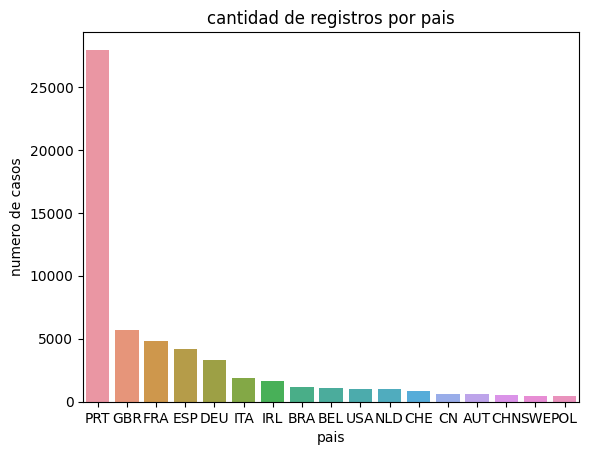

In [40]:
sns.barplot(data = country_More_than_mean.reset_index(),x = 'index' , y = 'country')
plt.ylabel('numero de casos')
plt.xlabel('pais')
plt.title('cantidad de registros por pais')
plt.show()


In [41]:
adults_values = df['adults'].value_counts()
adults_values.describe()

count       13.000000
mean      4762.538462
std      13083.056553
min          1.000000
25%          1.000000
50%          2.000000
75%        197.000000
max      46962.000000
Name: adults, dtype: float64

In [42]:
adults_More_than_mean = adults_values[adults_values > adults_values.mean()]
adults_More_than_mean

2    46962
1    11549
Name: adults, dtype: int64

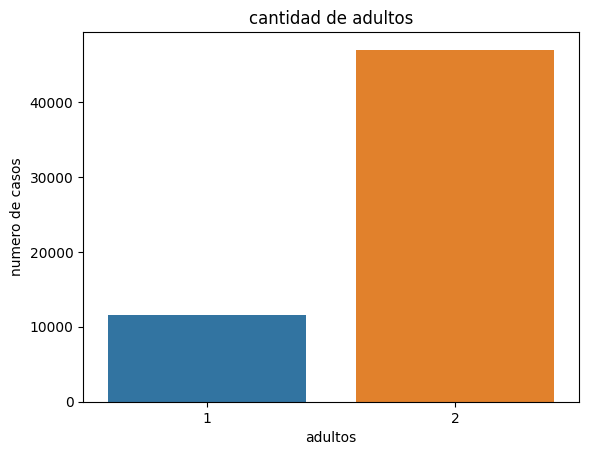

In [43]:
sns.barplot(data = adults_More_than_mean.reset_index(),x = 'index' , y = 'adults')
plt.ylabel('numero de casos')
plt.xlabel('adultos')
plt.title('cantidad de adultos')
plt.show()

#Variable adultos, children y babies

In [44]:
df['adults'].describe()

count    61913.000000
mean         1.862791
std          0.589066
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

In [45]:
df['children'].describe()

count    61913.000000
mean         0.104889
std          0.402835
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

In [46]:
df['babies'].describe()

count    61913.000000
mean         0.007155
std          0.092158
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: babies, dtype: float64

se plantea funcion de deteccion de outliers

In [47]:
def detect_outliers(data, col_name):
    """
    Esta función detecta los outliers en una columna específica utilizando el rango intercuartílico (IQR).

    Args:
    data: Un DataFrame de pandas que contiene la columna a analizar.
    col_name: El nombre de la columna a analizar.

    Returns:
    Un DataFrame que contiene los outliers detectados.
    """
    # Se calcula el primer y tercer cuartil
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)

    # Se calcula el rango intercuartílico (IQR)
    iqr = q3 - q1

    # Se define un umbral para detectar los outliers
    threshold = 1.5 * iqr

    # Se encuentran los valores que se encuentran fuera del umbral
    outliers = data[(data[col_name] < q1 - threshold) | (data[col_name] > q3 + threshold)]

    return outliers

se busca outliers en children, babies y adults

In [48]:
outliers_children=detect_outliers(df,'children')
outliers_children['children']

2        2
53       1
71       2
93       1
96       2
        ..
61886    1
61889    2
61902    1
61903    3
61906    1
Name: children, Length: 4452, dtype: int64

se ve que detecta como outliers los que tienen mas de 1 hijo, son 4452 casos

In [49]:
outliers_adults=detect_outliers(df,'adults')
outliers_adults['adults']

0        1
5        1
11       1
13       1
25       1
        ..
61901    1
61904    1
61907    1
61909    1
61910    1
Name: adults, Length: 14951, dtype: int64

se ve que pone como outliers los que son 1 adulto o mas, son la gran mayoria

In [50]:
outliers_babies=detect_outliers(df,'babies')
outliers_babies['babies']

147      1
184      1
262      1
621      1
704      1
        ..
61454    1
61597    1
61632    1
61637    1
61729    1
Name: babies, Length: 428, dtype: int64

pone como outliers lo que tienen un hijo o mas, son 428 casis

#casos de los 3 campos en 0


In [59]:
niños=df[(df['children']>0)==True]
niños['id']

2        2226c018-ea20-4c4e-8f71-ea66aee70d7c
53       564ca867-b9e2-4301-8f24-39c68d7b0ceb
71       eb27eac0-9cf3-4eb1-bf24-3060feb44075
93       84ab1029-8fd8-451f-9cde-06b5f07bd564
96       dcaf076d-bd38-47dd-8d9d-16be09cd5b08
                         ...                 
61886    89e0eb21-64cd-44f2-930d-79b83115a683
61889    c7981146-048c-4ec2-8c14-9df1ba8708af
61902    9861c336-6b3d-4a35-83ef-9c7d8a18886c
61903    a24e074b-8bbc-47ab-9154-70592f1fac09
61906    8a4d1423-1343-4e9f-a6df-68adf4d173bf
Name: id, Length: 4452, dtype: object

In [61]:
bebes=df[(df['babies']>0)==True]
bebes['id']

147      c360712b-51f9-4cb2-ae99-c7318e329c1c
184      031bae88-eab7-4711-8d3c-def23a756fd8
262      02345d6b-4d87-4e93-8997-a6fc0903e1b9
621      5a0d9f70-f093-48bd-a9de-f7cd1ec9e9df
704      7229e2a7-3b45-41e8-bf5a-62323838c444
                         ...                 
61454    3606b7d1-0c1e-450f-b2fa-c4cb08768cac
61597    34604620-080f-49b2-83e4-5d92cd95bfb8
61632    edee08fa-4fe1-42e9-94db-b15746b89ea6
61637    853d786b-05ed-4b6e-bce1-36be9d90500d
61729    aae337cd-5ee2-4986-86e7-7769b4ae63ef
Name: id, Length: 428, dtype: object

In [63]:
from itertools import product

In [68]:
sinadultos=df[(df['adults']==0)==True]
sinadultos['id']

96       dcaf076d-bd38-47dd-8d9d-16be09cd5b08
212      55c9b5f9-b5d0-49a2-9348-c6476a0bd772
270      6a48e05e-c36a-41d0-b7e0-5f8b92dab109
326      74fe3153-e2ae-4650-a375-05fc52881a56
464      cfe370c2-298a-4de8-82fd-f8d418febd7f
                         ...                 
59982    8b700cc2-903e-4400-9c68-aba04d69de38
60837    070652d9-948b-47a3-bb96-113627bb5558
60994    17552f62-53e5-4bdf-877d-c2b9769ec27a
61003    c6b4f9bb-b1f7-4765-a4af-5846748c13f4
61298    f2229afc-8196-4e61-8e5f-1a0affacd756
Name: id, Length: 197, dtype: object

la idea seria ver cuales cumplen las 3 condiciones a la vez